<a href="https://colab.research.google.com/github/Al-Jazzazi/ML-Network-Security-IDS/blob/main/IDS_calsifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Intrusion Detection Using Machine Learning

## Introduction

In this project, I aim to develop an **AI-powered Network Intrusion Detection System (IDS)** that uses **machine learning** techniques to detect network anomalies and intrusions. My approach leverages the **CICIDS2017 dataset**, which contains real-world network traffic data with labeled instances of both normal activities and various types of cyber-attacks. The goal is to build and train a machine learning model that can effectively differentiate between benign network traffic and malicious intrusions based on behavior and anomalies in the network patterns.

### Dataset Overview: CICIDS2017

The **CICIDS2017** dataset, provided by the Canadian Institute for Cybersecurity, includes a variety of real-world network traffic data with labeled instances of both benign and malicious activities. This dataset includes network flows that represent normal behavior as well as attacks such as **DoS (Denial of Service), DDoS (Distributed Denial of Service), Botnet, and other network-based threats**. The CICIDS2017 dataset is particularly suitable for this project because of its **realistic traffic patterns** and **comprehensive labeling**, making it ideal for training and evaluating machine learning models for intrusion detection.

[More information about the dataset](https://www.unb.ca/cic/datasets/ids-2017.html)

[Dataset source I will be using](https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset/data)
### Project Objective

The primary objective of this notebook is to:
1. **Preprocess the CICIDS2017 dataset** to clean and prepare the data for machine learning models.
2. **Train various machine learning models** (e.g., Random Forest, SVM, Neural Networks) to detect network intrusions.
3. **Evaluate the performance** of these models using standard metrics such as accuracy, precision, recall, and F1-score.
4. **Identify the best-performing model** for detecting intrusions and anomalies in network traffic.

By the end of this project, we aim to have a machine learning model capable of accurately identifying malicious behavior in network traffic, paving the way for more robust and adaptive network security systems.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [2]:
import pandas as pd

fn ='Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
df = pd.read_csv(fn)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df = df.dropna()
print(df.columns)




Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

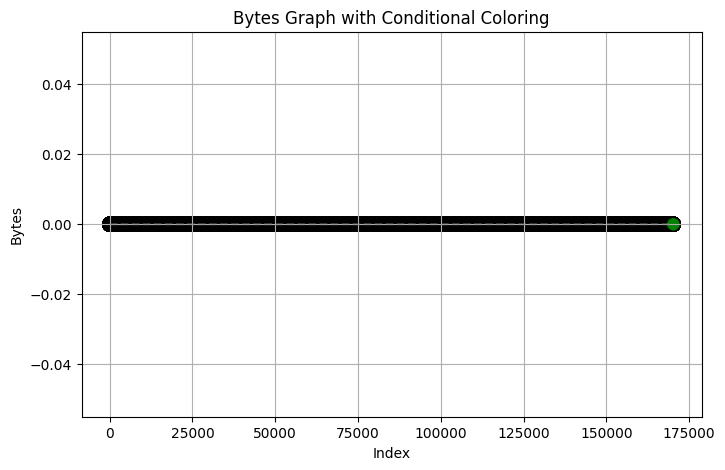

In [28]:
import matplotlib.pyplot as plt


byets = df[" Bwd Avg Bytes/Bulk"]
labels = df[" Label"]

bytes = np.array(byets)
label = np.array(labels)

# I = label != "BENIGN"
# bytes = bytes[I]
# labels = labels[I]

colors = ['g' if label == "BENIGN" else 'r' for label in labels]  # 'g' for BENIGN, 'r' otherwise
plt.figure(figsize=(8, 5))
plt.scatter(range(len(bytes)), bytes, c=colors, s=100, edgecolor='k', label='Data Points')  # Scatter plot
plt.plot(bytes, linestyle='--', alpha=0.5, color='gray', label='Trend Line')  # Optional trend line

# Add labels and title
plt.title("Bytes Graph with Conditional Coloring")
plt.xlabel("Index")
plt.ylabel("Bytes")
plt.grid(True)

In [3]:
print(df.head)


<bound method NDFrame.head of          Destination Port   Flow Duration   Total Fwd Packets  \
0                     389       113095465                  48   
1                     389       113473706                  68   
2                       0       119945515                 150   
3                     443        60261928                   9   
4                      53             269                   2   
...                   ...             ...                 ...   
170361              55641              49                   1   
170362              45337             217                   2   
170363                 22         1387547                  41   
170364                 22             207                   1   
170365              60146              50                   1   

         Total Backward Packets  Total Length of Fwd Packets  \
0                            24                         9668   
1                            40                        11364 

In [ ]:
X = np.array(df.drop(columns=' Label'))
y = np.array(df[' Label'])
print(X.shape)
l = set(y)
print(l)



(170231, 78)
{'BENIGN', 'Web Attack � Sql Injection', 'Web Attack � Brute Force', 'Web Attack � XSS'}


In [ ]:
I = y == 'BENIGN'
print("The number of BENIGN is ", np.sum(I))
print("which is " + str(np.sum(I)/len(I)) + " of the dataset")

The number of BENIGN is  168051
which is 0.9871938718564773 of the dataset


In [ ]:
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

std_X[std_X == 0] = 1

X_scale = (X - mean_X) / std_X



In [ ]:
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X_scale, I, test_size=0.3, random_state=42)


In [ ]:
from sklearn import svm
svc = svm.SVC()


In [ ]:
svc.fit(Xtr,ytr)

SVC()

In [ ]:
y_hat = svc.predict(Xts)
recall = np.mean(y_hat == yts)
print(recall)

0.9944390052868611


In [ ]:
false_positives = np.sum((y_hat == True) & (yts == False))/np.sum(y_hat == True)
false_negatives = np.sum((y_hat == False) & (yts == True))/np.sum(y_hat == False)
print("false positives percent amongst all positives (ie predicting BENIGN when actual is attack) ", false_positives)
print("false negatives percent amongst all negatives (ie predicting Attack when actual is benign) ", false_negatives)


false positives percent amongst all positives (ie predicting BENIGN when actual is attack)  0.0018684529607028563
false negatives percent amongst all negatives (ie predicting Attack when actual is benign)  0.24967148488830487


In [ ]:
from sklearn.metrics import precision_score, accuracy_score, f1_score

# Calculate precision, accuracy, and F1-score
precision = precision_score(yts, y_hat)
accuracy = accuracy_score(yts, y_hat)
f1 = f1_score(yts, y_hat)

print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9981
Accuracy: 0.9944
F1-Score: 0.9972


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Explore values of C from 0.1 to 100
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],  # Explore different gamma values
    'kernel': ['rbf']  # Use RBF kernel
}

# Instantiate an SVM classifier
svc = svm.SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5)  # 5-fold cross-validation

# Fit grid search to the data (X, y)
grid_search.fit(Xtr, ytr)

# Get the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters found: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.9992782858800116
